In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# load and some preprocessing 
bls_data = pd.read_csv("bls_data.csv")
bls_data = bls_data.drop(columns=['footnotes'])
bls_data['year'] = bls_data['year'].astype(int)
bls_data['value'] = bls_data['value'].astype(float)
bls_data['month'] = bls_data['period'].str.extract('(\d+)').astype(int)
bls_data['date'] = pd.to_datetime(bls_data['year'].astype(str) + '-' + bls_data['month'].astype(str) + '-01')

series_mapping = {
    'LAUMT063108000000003': 'Unemployment Rate (%)',
    'LAUMT063108000000004': 'Number of Unemployed Persons',
    'LAUMT063108000000005': 'Number of Employed Persons',
    'LAUMT063108000000006': 'Total Labor Force'
}

bls_data['series_label'] = bls_data['series_id'].map(series_mapping)
annual_mean = bls_data.groupby(['year', 'series_label'])['value'].mean().reset_index()
print(annual_mean)

    year                  series_label         value
0   2014    Number of Employed Persons  6.050647e+06
1   2014  Number of Unemployed Persons  4.972112e+05
2   2014             Total Labor Force  6.547858e+06
3   2014         Unemployment Rate (%)  7.600000e+00
4   2015    Number of Employed Persons  6.154113e+06
5   2015  Number of Unemployed Persons  4.039380e+05
6   2015             Total Labor Force  6.558051e+06
7   2015         Unemployment Rate (%)  6.158333e+00
8   2016    Number of Employed Persons  6.283934e+06
9   2016  Number of Unemployed Persons  3.324338e+05
10  2016             Total Labor Force  6.616368e+06
11  2016         Unemployment Rate (%)  5.033333e+00
12  2017    Number of Employed Persons  6.413122e+06
13  2017  Number of Unemployed Persons  3.024748e+05
14  2017             Total Labor Force  6.715597e+06
15  2017         Unemployment Rate (%)  4.508333e+00
16  2018    Number of Employed Persons  6.450601e+06
17  2018  Number of Unemployed Persons  2.8538

In [113]:
merged_data = pd.read_csv("merged_data.csv")
merged_data['incidentBeginDate'] = pd.to_datetime(merged_data['incidentBeginDate'], errors='coerce')
merged_data['incidentEndDate'] = pd.to_datetime(merged_data['incidentEndDate'], errors='coerce')

In [114]:
# link bls data with disaster data
linked_data = pd.merge_asof(
    bls_data.sort_values('date'),
    merged_data.sort_values('incidentBeginDate'),
    left_on='date',
    right_on='incidentBeginDate',
    direction='nearest',
    tolerance=pd.Timedelta('365 days')
)
linked_data['post_disaster_end'] = linked_data['incidentEndDate'] + pd.DateOffset(months=1)
linked_data

,series_id,year,period,value,month,date,series_label,femaDeclarationString,disasterNumber,state,...,incidentYear,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),post_disaster_end
0,LAUMT063108000000004,2014,M01,535288.0,1,2014-01-01,Number of Unemployed Persons,FM-5051-CA,5051,CA,...,2014,5.5,10.7,3.2,1015.0,560097732.0,42.2,2.0,50.4,2014-02-22
1,LAUMT063108000000005,2014,M01,5947789.0,1,2014-01-01,Number of Employed Persons,FM-5051-CA,5051,CA,...,2014,5.5,10.7,3.2,1015.0,560097732.0,42.2,2.0,50.4,2014-02-22
2,LAUMT063108000000003,2014,M01,8.3,1,2014-01-01,Unemployment Rate (%),FM-5051-CA,5051,CA,...,2014,5.5,10.7,3.2,1015.0,560097732.0,42.2,2.0,50.4,2014-02-22
3,LAUMT063108000000006,2014,M01,6483077.0,1,2014-01-01,Total Labor Force,FM-5051-CA,5051,CA,...,2014,5.5,10.7,3.2,1015.0,560097732.0,42.2,2.0,50.4,2014-02-22
4,LAUMT063108000000003,2014,M02,8.2,2,2014-02-01,Unemployment Rate (%),FM-5051-CA,5051,CA,...,2014,5.5,10.7,3.2,1015.0,560097732.0,42.2,2.0,50.4,2014-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,LAUMT063108000000006,2024,M10,6668810.0,10,2024-10-01,Total Labor Force,DR-4769-CA,4769,CA,...,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-09
520,LAUMT063108000000006,2024,M11,6628699.0,11,2024-11-01,Total Labor Force,DR-4769-CA,4769,CA,...,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-09
521,LAUMT063108000000005,2024,M11,6270856.0,11,2024-11-01,Number of Employed Persons,DR-4769-CA,4769,CA,...,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-09
522,LAUMT063108000000004,2024,M11,357843.0,11,2024-11-01,Number of Unemployed Persons,DR-4769-CA,4769,CA,...,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-09


series_label  Number of Employed Persons  Number of Unemployed Persons  \
month_offset                                                             
-3                          6.212355e+06                 415314.600000   
-2                          6.255328e+06                 380500.250000   
-1                          6.232603e+06                 397936.310345   
 0                          6.286453e+06                 362920.948718   
 1                          6.247197e+06                 369126.692308   
 2                          6.091254e+06                 463479.625000   
 3                          6.083307e+06                 439091.333333   
 4                          6.275350e+06                 363753.000000   
 5                          6.285633e+06                 401015.000000   
 6                          6.272919e+06                 411467.000000   
 7                          6.347784e+06                 372764.000000   
 8                          6.295631e+

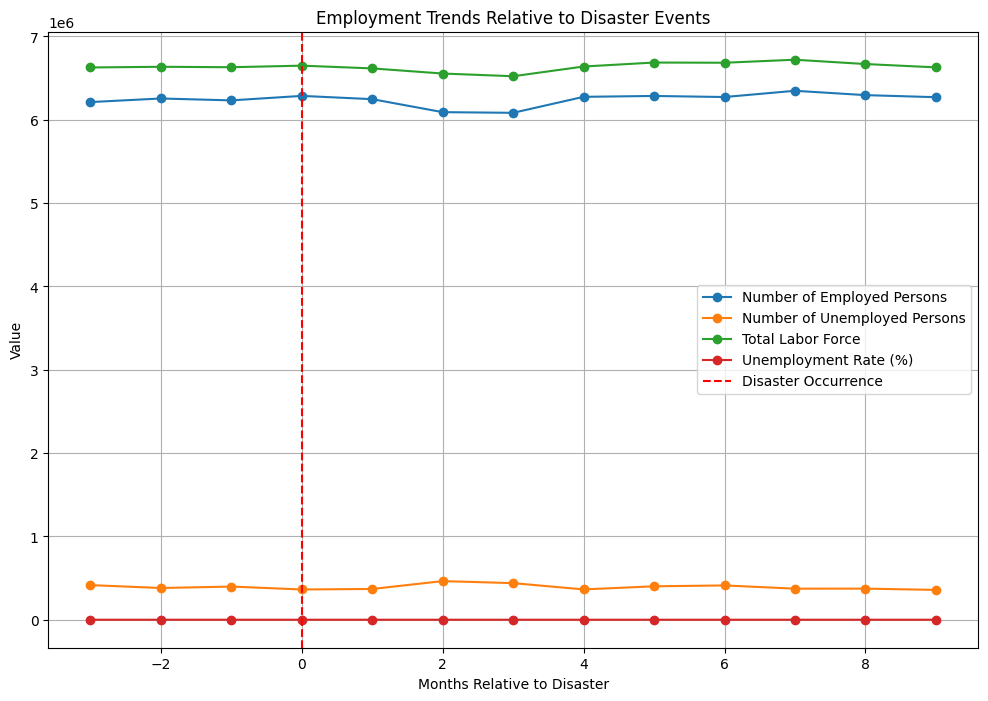

In [115]:
# Calculate month offset relative to the disaster incident start date
linked_data['month_offset'] = ((linked_data['date'] - linked_data['incidentBeginDate']).dt.days // 30)

# 3 months before to 12 months after the disaster
analysis_window = linked_data[(linked_data['month_offset'] >= -3) & (linked_data['month_offset'] <= 12)]

# Average values per month offset for each series label
pivot_table = analysis_window.pivot_table(
    index='month_offset', 
    columns='series_label', 
    values='value', 
    aggfunc='mean'
)
print(pivot_table)

# Visualize the trends
plt.figure(figsize=(12, 8))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], marker='o', label=column)
plt.axvline(x=0, color='red', linestyle='--', label='Disaster Occurrence')
plt.title("Employment Trends Relative to Disaster Events")
plt.xlabel("Months Relative to Disaster")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

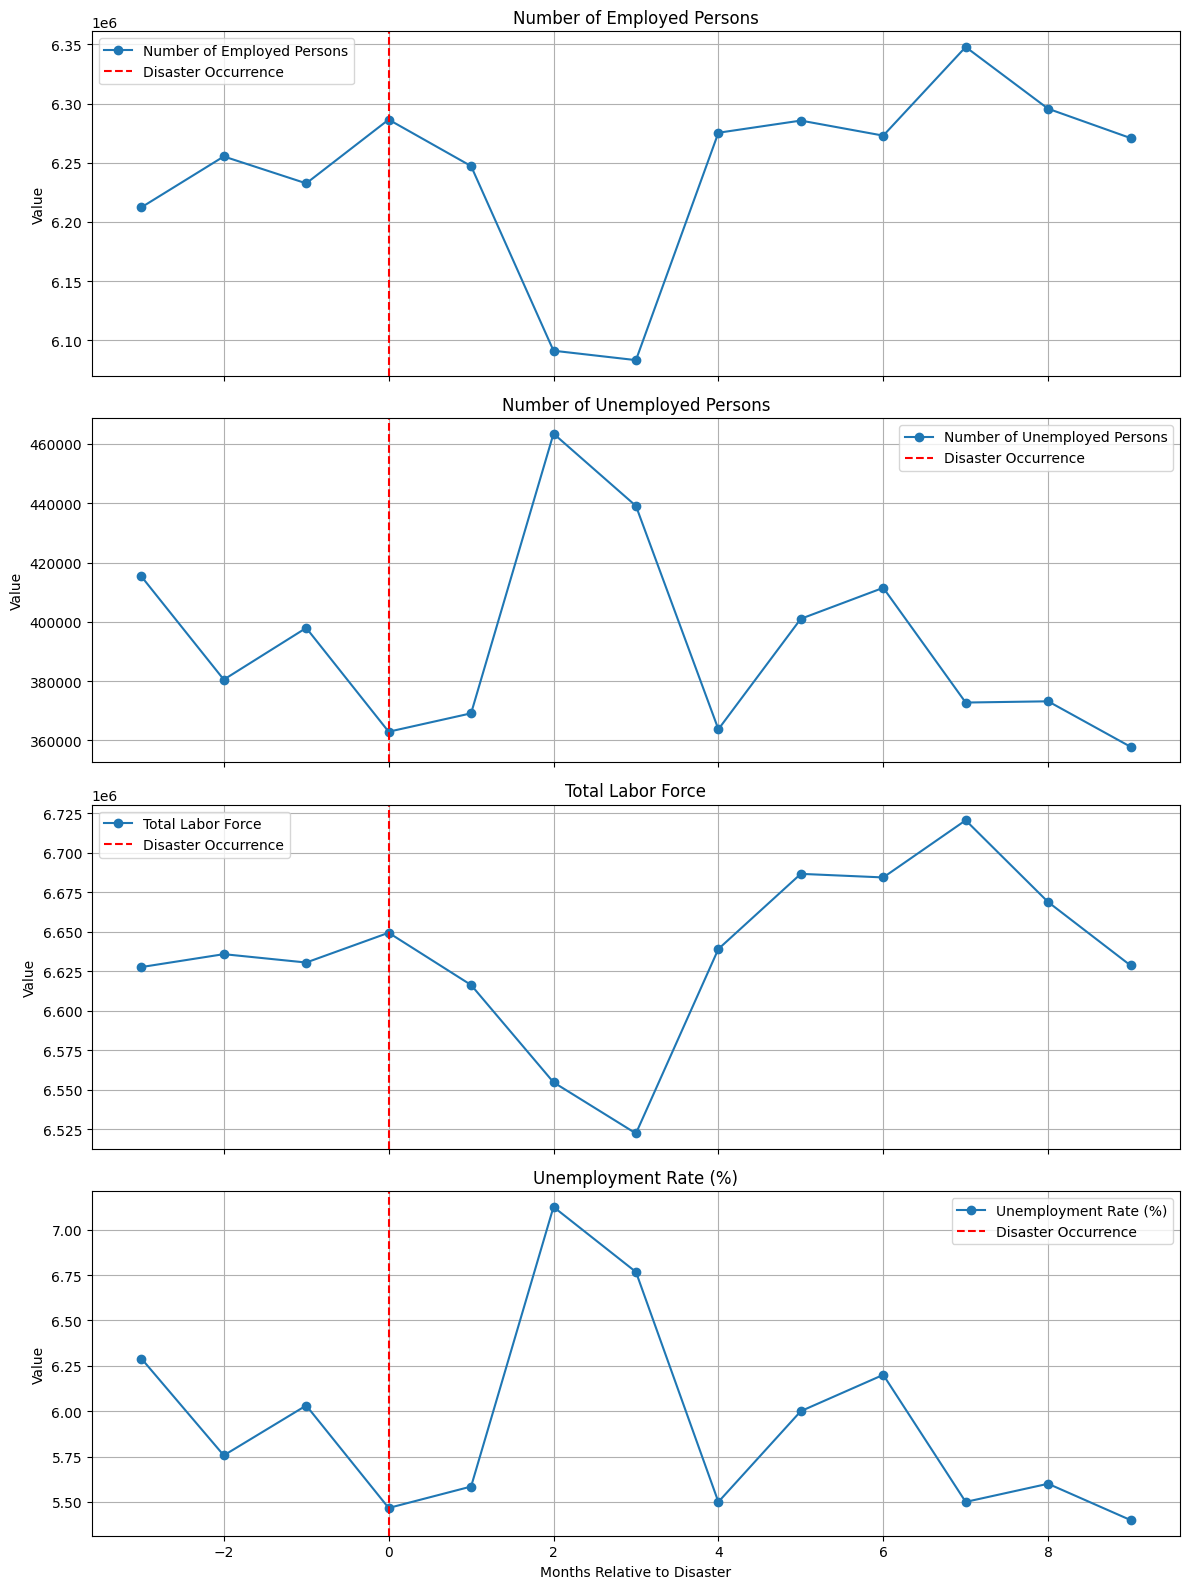

In [116]:
# create separate subplots for each metric
metrics = pivot_table.columns
n_metrics = len(metrics)

fig, axes = plt.subplots(n_metrics, 1, figsize=(12, 4*n_metrics), sharex=True)

if n_metrics == 1:
    axes = [axes]

for ax, metric in zip(axes, metrics):
    ax.plot(pivot_table.index, pivot_table[metric], marker='o', label=metric)
    ax.axvline(x=0, color='red', linestyle='--', label='Disaster Occurrence')
    ax.set_title(metric)
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

plt.xlabel("Months Relative to Disaster")
plt.tight_layout()
plt.show()

In [117]:
merged_data['duration'] = (merged_data['incidentEndDate'] - merged_data['incidentBeginDate']).dt.days
annual_disasters = merged_data.groupby('incidentYear').agg(
    frequency=('incidentId', 'count'),
    avg_duration=('duration', 'mean'),
    avg_temperature=('Avg Temperature (°C)', 'mean'),
    avg_sea_level=('Sea Level Rise (mm)', 'mean')
).reset_index()

print(annual_disasters)

    incidentYear  frequency  avg_duration  avg_temperature  avg_sea_level
0           1954          1      0.000000              NaN            NaN
1           1955          1      0.000000              NaN            NaN
2           1956          1      0.000000              NaN            NaN
3           1958          1      0.000000              NaN            NaN
4           1961          1      0.000000              NaN            NaN
..           ...        ...           ...              ...            ...
58          2020        620    915.090323        14.250000       3.325000
59          2021         32     68.250000        26.450000       2.600000
60          2022        357     31.745098        17.285714       3.528571
61          2023        980     90.478571        16.257143       2.671429
62          2024         12      7.750000              NaN            NaN

[63 rows x 5 columns]


In [118]:
# temperature-frequency correlation
df_temp_freq = annual_disasters[['avg_temperature', 'frequency']].dropna()
corr_temp_freq, p_temp_freq = pearsonr(df_temp_freq['avg_temperature'], df_temp_freq['frequency'])

# level-frequency correlation
df_sea_freq = annual_disasters[['avg_sea_level', 'frequency']].dropna()
corr_sea_freq, p_sea_freq = pearsonr(df_sea_freq['avg_sea_level'], df_sea_freq['frequency'])

# temperature-duration correlation
df_temp_dur = annual_disasters[['avg_temperature', 'avg_duration']].dropna()
corr_temp_dur, p_temp_dur = pearsonr(df_temp_dur['avg_temperature'], df_temp_dur['avg_duration'])

# level-duration correlation
df_sea_dur = annual_disasters[['avg_sea_level', 'avg_duration']].dropna()
corr_sea_dur, p_sea_dur = pearsonr(df_sea_dur['avg_sea_level'], df_sea_dur['avg_duration'])

print("Correlation between Avg Temperature and Disaster Frequency: {:.2f} (p={:.3f})".format(corr_temp_freq, p_temp_freq))
print("Correlation between Sea Level Rise and Disaster Frequency: {:.2f} (p={:.3f})".format(corr_sea_freq, p_sea_freq))
print("Correlation between Avg Temperature and Avg Disaster Duration: {:.2f} (p={:.3f})".format(corr_temp_dur, p_temp_dur))
print("Correlation between Sea Level Rise and Avg Disaster Duration: {:.2f} (p={:.3f})".format(corr_sea_dur, p_sea_dur))

Correlation between Avg Temperature and Disaster Frequency: -0.17 (p=0.457)
Correlation between Sea Level Rise and Disaster Frequency: 0.07 (p=0.747)
Correlation between Avg Temperature and Avg Disaster Duration: -0.19 (p=0.408)
Correlation between Sea Level Rise and Avg Disaster Duration: 0.17 (p=0.461)


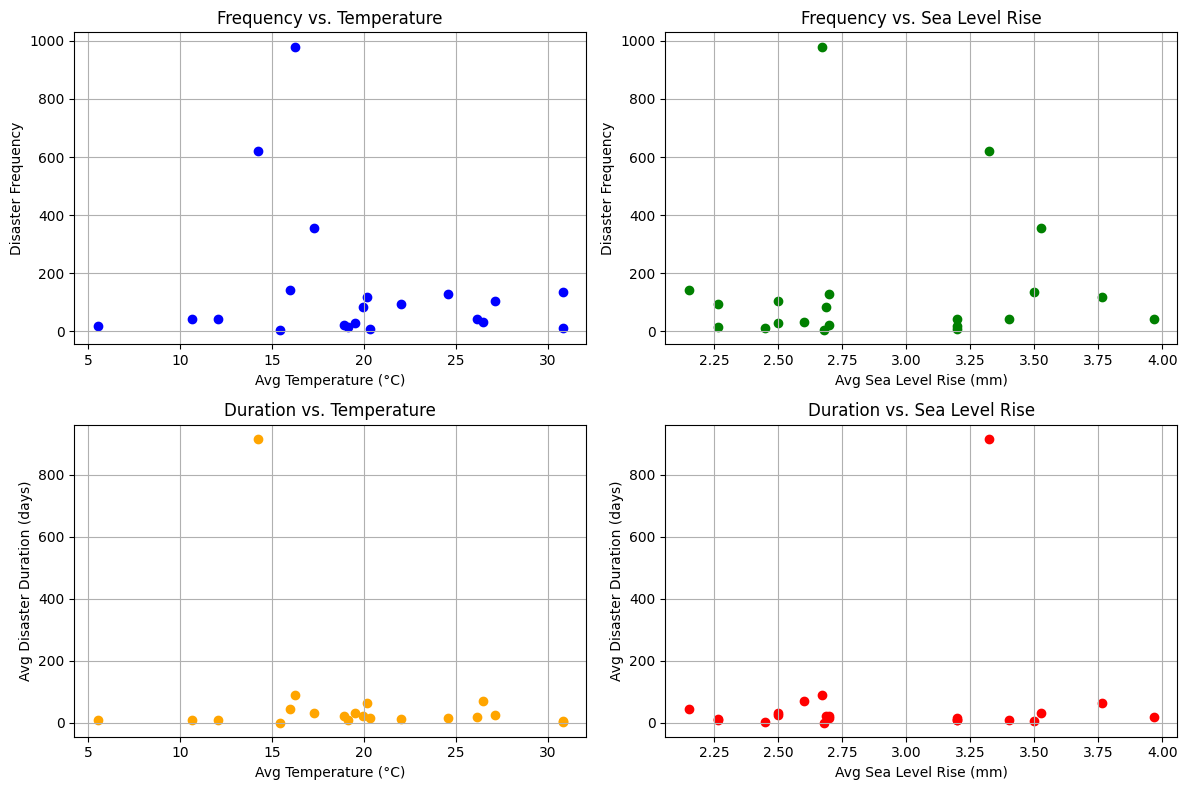

In [119]:
plt.figure(figsize=(12,8))

# Scatterplot: Avg Temperature vs Disaster Frequency
plt.subplot(2,2,1)
plt.scatter(annual_disasters['avg_temperature'], annual_disasters['frequency'], color='blue')
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Disaster Frequency")
plt.title("Frequency vs. Temperature")
plt.grid(True)

# Scatterplot: Sea Level Rise vs Disaster Frequency
plt.subplot(2,2,2)
plt.scatter(annual_disasters['avg_sea_level'], annual_disasters['frequency'], color='green')
plt.xlabel("Avg Sea Level Rise (mm)")
plt.ylabel("Disaster Frequency")
plt.title("Frequency vs. Sea Level Rise")
plt.grid(True)

# Scatterplot: Avg Temperature vs Avg Disaster Duration
plt.subplot(2,2,3)
plt.scatter(annual_disasters['avg_temperature'], annual_disasters['avg_duration'], color='orange')
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Avg Disaster Duration (days)")
plt.title("Duration vs. Temperature")
plt.grid(True)

# Scatterplot: Sea Level Rise vs Avg Disaster Duration
plt.subplot(2,2,4)
plt.scatter(annual_disasters['avg_sea_level'], annual_disasters['avg_duration'], color='red')
plt.xlabel("Avg Sea Level Rise (mm)")
plt.ylabel("Avg Disaster Duration (days)")
plt.title("Duration vs. Sea Level Rise")
plt.grid(True)

plt.tight_layout()
plt.show()